<div style="background-color:#057BA3; padding:6px; color:#ffffff;">

## IUCAA Finesse Workshop 18-22nd Dec 2019
</div>


# Beams and Mirrors 

It's finally time to start modelling! These first tasks are designed to get you accquainted with some of the basic features of how Finesse works, and how it relates to the physics you have just reviewed in the previous notebooks. Here we will just look at a laser and mirror component and how the optical field behaves. 

The tasks will involve several steps each. This will usually be looking up how to write Finesse commands, forming a Finesse model, running the simulation with Pykat, and then relating the results you see back to the theory from the lectures.

Remember, these tasks are meant to get you thinking and comparing to the theory you have learned. Talk to your fellow students and ask lots of questions! 

## Goal of the session
**Finesse/Pykat things you will learn**:
 - How to approach building a model
 - How to vary a parameter and plot the resulting output

## Getting Started

We start by loading PyKat and the other Python packages we will need:

(type shift+enter to run)

In [1]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
from pprint import pprint

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.1.331         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



## Tasks

<div style="background-color:#cceffc;padding:10px;">

### Task 1: Laser and a mirror

Write the Finesse code to model a laser outputting 10W of power that is incident on a mirror 1m away. The mirror should reflect 80% of the light and transmit 20%. 
</div>

You'll find the following references useful:
- <a href="http://www.gwoptics.org/finesse/reference/">Finesse online syntax reference</a>
- <a href="http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf">Finesse Manual</a>


You should write your Finesse code in a multi-line string variable, for example:
```python
code = """
This
is a
multi-line
string
"""
```
Each line should contain one Finesse command.

In [8]:
code = """
%------------------------------------------------------------------------
% laser outputting 10W of power that is incident on a mirror 1m away. 
% The mirror should reflect 80% of the light and transmit 20%
% l name P f [phase] node - laser
% m name R T phi node1 node2 - mirror
%  (or: m1 name T Loss phi ...
%  m2 name R Loss phi ... )
% s name L [n] node1 node2 - space
%------------------------------------------------------------------------ 
 
# optical setup: laser, space and mirror:
l l1 10.0 0 n1
s s1 1 n1 n2
m m1 0.8 0.2 0 n2 n3


#measure power T and R
pd Prefl n2
pd Ptran n3

xaxis l1 P lin 0 1 10
yaxis abs 

"""


<div style="background-color:#cceffc;padding:10px;">

### Task 2: Laser and a mirror kat object

1.  Create a `kat` object and add the Finesse code you created in Task 1 to it using the `kat.parse` function.


2.  Add two photo diodes to measure the optical power reflected and transmitted at the mirror.

</div>

In [9]:
kat = finesse.kat()
kat.parse(code)




<div style="background-color:#cceffc;padding:10px;">

### Task 3: Power conservation

Using the kat object above, set `kat.noxaxis = True`. This tells Finesse to compute just one data point for our model and not change any parameters. You can also set `kat.verbose = False` to stop it from printing information when the simulation is running.

1.  Run this kat object to get the simulation output.


2. Does the reflected and transmitted power match up with the input power?

</div>

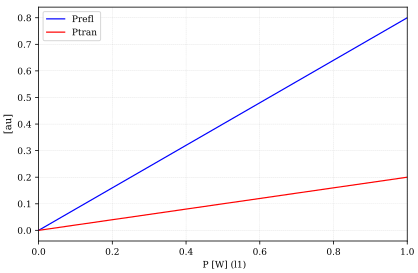

{'StartDateTime': datetime.datetime(2020, 6, 9, 16, 9, 29, 979754),
 '____FROZEN____': True,
 'katScript': '% Generated by PyKat 09.06.2020 16:09:29\n'
              '\n'
              'l l1 10.0 0.0 0.0 n1\n'
              's s1 1.0 n1 n2\n'
              'm m1 0.8 0.2 0.0 n2 n3\n'
              'pd0 Prefl n2\n'
              'pd0 Ptran n3\n'
              'xaxis l1 P lin 0 1 10\n'
              'yaxis lin abs\n'
              'time\n'
              'gnuterm no\n'
              'pyterm no\n',
 'katVersion': None,
 'runDateTime': datetime.datetime(2020, 6, 9, 16, 9, 30, 316890),
 'runtime': 0.0494654,
 'stderr': '\r',
 'stdout': '\r\n'
           '------------------------------------------------------------------------\r\n'
           '                     FINESSE 2.2                (build '
           '2.2-11-ga945edac)\r\n'
           '       o_.-=.        Frequency domain INterferomEter Simulation '
           'SoftwarE\r\n'
           '      (\\\'".\\|        04.08.2017         '
 

In [13]:
#1.
kat.noaxis = True
kat.verbose = False

out = kat.run()

out.plot()

    
pprint(vars(out))

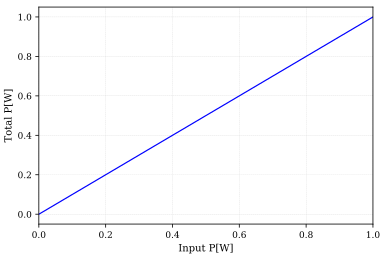

In [12]:
# 2. yep.
total = [0]*11

for i in range(11):
    total[i] = out.y[i][0]+out.y[i][1]

plt.xlabel("Input P[W]")
plt.ylabel("Total P[W]")
plt.plot(out.x,total)

<div style="background-color:#cceffc;padding:10px;">

### Task 4: Complex fields

The optical field has both an amplitude and a phase. We can output this in Finesse using the amplitude detector (`ad`).

For this task you should look up the syntax for the `ad` detector. 

**Hint:** the frequency given in the `ad` detector is relative to the default optical frequency $f = c/1064$nm. You can see what the default wavelength is using `kat.lambda0`. 


1. Add three amplitude detectors: one looking at the beam going into the mirror, one looking at the reflected field, and another looking at the transmitted field. Add the command `yaxis abs:deg` to output a complex number from Finesse so we can get the magnitude and phase of the field.


2. Run the kat object and print the magnitude and phases of the optical fields. What is the difference in phase from the incident field to the reflected field and incident field to tranmitted field? Why is the phase different on transmission?


3. What units do the `pd` and `ad` detector outputs in Finesse have?

</div>

#### Lengths and tunings

One of the most crucial aspects in optical interferometery is accurately positioning mirrors. The optical wavelengths we use in gravitational wave detectors is $\lambda=1064$nm. Typically we are interested in either **macroscopic** positioning, such as a mirror is 1m, 1cm, 1mm, etc. away, or in **microscopic** positions which are fractions of $\lambda$. The resonance condition of a Fabry-Perot cavity requires its length to be an integer number of half-wavelengths. For the light of an Nd:YAG laser, length differences $\ll \lambda=1064$nm are of interest. Some orders of magnitude:
  * LIGO peak senitivity in meters: $\sim 10^{-20}$ m
  * LIGO cavity mirror postion control accuracy: $< 10^{-12}$ m
  * LIGO arm cavity length: $\sim 10^3$ m
  * Relative numerical accuracy of floating point numbers: $10^{-15}$

As we can see there are many orders of magnitude difference between the lengths of cavities and the types of signal we might measure. With such a large dynamic range typical floating point variables used in computers cannot represent this. Thus we break lengths up into macroscopic and microscopic lengths. The length given by the `space` component is macroscopic and is always rounded to the nearest interger number of $\lambda$.

We change the microscopic length differences in Finesse by changing a mirror's *tuning* value. Tuning is usually refered to in units of degrees, with 360 degrees $= \lambda$. So a tuning of 180 degrees means we have moved the mirror by half a wavelength.
You can read more about this in the Living Review, section 2.5, "Lengths and tunings: numerical accuracy of distances".

<div style="background-color:#cceffc;padding:10px;">

### Task 5: Mirror positions, or tunings

The aim of this task is to think about the phase relationships Finesse uses, as this is important to grasp for later tasks.

1. Using your `kat` object from before, change the mirror tuning by 90 degrees. How did the phase of the reflected and transmitted fields change relative to the incident field?


2. If you change the tuning by 360 degrees, do the amplitudes of the optical fields change?


3. If you change the length of the space between the mirror and laser, does it affect the phase?

</div>

<div style="background-color:#cceffc;padding:10px;">

### Task 6: Scanning parameters

So far we have just run a single data point in our simulations. Usually we want to change some thing and see how the outputs vary, and we will be doing this a lot in the coming notebooks. In Finesse we vary parameters in a simulation using the `xaxis` command, this changes some parameter from one value to another and computes it for $N$ steps between them.

1. Look up the syntax for the `xaxis` command.


2. Add an `xaxis` command to change the input laser power from 1W to 10W in 20 steps.


3. Plot the reflected and transmitted powers.


4. Does the sum of reflected and transmitted power always equal the input power?

</div>

In [16]:
kat = finesse.kat()
kat.parse(code)
kat.parse("""
pd Prefl n1
pd Ptran n2
yaxis abs:deg
xaxis l1 P lin 1 10 20
""")

kat.verbose = False

out.kat()


Removed existing object 'Prefl' of type <class
'pykat.detectors.pykat.detectors.pd_17'> to add line 'pd Prefl
n1'


Removed existing object 'Ptran' of type <class
'pykat.detectors.pykat.detectors.pd_18'> to add line 'pd Ptran
n2'


Removed existing object 'xaxis' of type <class
'pykat.commands.xaxis'> to add line 'xaxis l1 P lin 1 10 20'



AttributeError: 'KatRun' object has no attribute 'kat'